In [120]:
%matplotlib inline

In [136]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn import metrics
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns


Użyj biblioteki statsmodels do wykonania regresji liniowej z mpg jako zmienną objaśnianą, a horsepower jako predyktorem (np. metoda OLS). Wyjaśnij informacje
zwracane przez metodę model.summary(), w szczególności: przedziały ufności, pvalues, T-statistic, F-statistic i R2
. Możesz się wzorować na tej analizie w Jupyter
notebook.

In [122]:
auto = pd.read_csv('Auto.csv')
auto['origin'] = auto['origin'].astype('category')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['weight'] = pd.to_numeric(auto['weight'], errors='coerce')

auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [123]:
# Look for null values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [124]:
def myLinReg(model_formula, df, printMSE = False):
    """
    Function returns the summary for fitted linear model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """
    
    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
        
    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = sm.OLS(y_train, X_train) 
    result = model.fit() 

    
    

    if(printMSE==True):
        print(model_formula)

        # Show MSE for training set
        y_train_pred = result.predict(X_train)
        print(f'MSE_Train: {metrics.mean_squared_error(y_train, y_train_pred)}')

        # Show MSE for validation set
        y_valid_pred = result.predict(X_valid)
        print(f'MSE_Test: {metrics.mean_squared_error(y_valid, y_valid_pred)}\n')

    # Retrun fitted model summary
    return result

In [125]:
result = myLinReg('mpg ~ horsepower', auto)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     498.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.16e-67
Time:                        11:17:28   Log-Likelihood:                -965.62
No. Observations:                 324   AIC:                             1935.
Df Residuals:                     322   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6925      0.773     51.319      0.000      38.171      41.214
horsepower    -0.1550      0.007    -22.332      0.000      -0.169      -0.141
==============================================================================
Omnibus:                       10.969   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.104
Skew:                           0.434   Prob(JB):                      0.00388
Kurtosis:                       3.260   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich
zmiennych w zbiorze danych. Możesz użyć pandas.plotting.scatter_matrix(...).
Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji corr() dla DataFrame z biblioteki pandas.

                   mpg  horsepower    weight  acceleration      year    origin
mpg           1.000000   -0.778427 -0.831739      0.422297  0.581469  0.563698
horsepower   -0.778427    1.000000  0.864538     -0.689196 -0.416361 -0.455171
weight       -0.831739    0.864538  1.000000     -0.419502 -0.307900 -0.581265
acceleration  0.422297   -0.689196 -0.419502      1.000000  0.282901  0.210084
year          0.581469   -0.416361 -0.307900      0.282901  1.000000  0.184314
origin        0.563698   -0.455171 -0.581265      0.210084  0.184314  1.000000


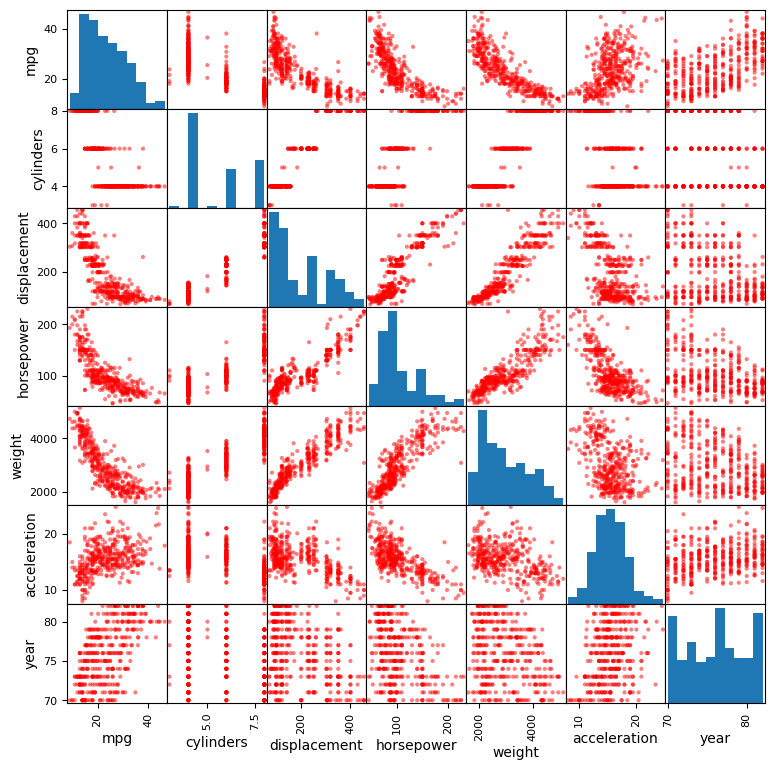

In [126]:
df_auto = auto[['mpg','horsepower','weight','acceleration','year','origin']]

print(df_auto.corr())
plt.close()
pd.plotting.scatter_matrix(auto,color="red",figsize=(9,9))
plt.show()

In [127]:
models = ['mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin',]


Przeprowadź regresję liniową z mpg jako zmienną objaśnianą i wszystkimi innymi
zmiennymi (z wyjątkiem name) jako predyktorami. Spróbuj zdefiniować różne modele
wykorzystując biblioteką patsy i używając symboli +, *, : oraz różnych transformacji
zmiennych, takich jak na przykład I(np.log(X)) lub I(np.sqrt(X)). Co to jest błąd
generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?


In [128]:
result = myLinReg(models[0], auto, printMSE=True)
result.summary()

mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 10.915003994007783
MSE_Test: 10.101240690414354



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     168.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          3.53e-107
Time:                        11:17:30   Log-Likelihood:                -820.80
No. Observations:                 314   AIC:                             1660.
Df Residuals:                     305   BIC:                             1693.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.6483      5.218     -3.190      0.002     -26.917      -6.380
origin[T.2]      2.7032      0.644      4.196      0.000       1.435       3.971
origin[T.3]      2.6778      0.632      4.240      0.000       1.435       3.920
horsepower      -0.0055      0.015     -0.353      0.724      -0.036       0.025
weight          -0.0068      0.001     -8.497      0.000      -0.008      -0.005
acceleration     0.1317      0.111      1.188      0.236      -0.086       0.350
year             0.7424      0.059     12.647      0.000       0.627       0.858
displacement     0.0216      0.009      2.382      0.018       0.004       0.039
cylinders       -0.5408      0.365     -1.483      0.139      -1.258       0.177
==============================================================================
Omnibus:                       22.688   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.057
Skew:                           0.494   Prob(JB):                     4.02e-08
Kurtosis:                       4.276   Cond. No.                     8.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
result = myLinReg(models[1], auto, printMSE=True)
result.summary()

mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 9.122086760054943
MSE_Test: 12.936120795829684



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     214.0
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          6.17e-121
Time:                        11:17:30   Log-Likelihood:                -800.20
No. Observations:                 317   AIC:                             1618.
Df Residuals:                     308   BIC:                             1652.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                24.9587      9.362      2.666      0.008       6.538      43.379
origin[T.2]               2.3902      0.582      4.107      0.000       1.245       3.535
origin[T.3]               2.5626      0.556      4.609      0.000       1.469       3.657
I(np.log(horsepower))    -9.6275      1.663     -5.788      0.000     -12.901      -6.354
weight                   -0.0043      0.001     -5.177      0.000      -0.006      -0.003
acceleration             -0.3107      0.112     -2.765      0.006      -0.532      -0.090
year                      0.7565      0.054     14.126      0.000       0.651       0.862
displacement              0.0203      0.008      2.468      0.014       0.004       0.036
cylinders                -0.3916      0.336     -1.166      0.244      -1.052       0.269
==============================================================================
Omnibus:                       10.388   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.561
Skew:                           0.309   Prob(JB):                      0.00187
Kurtosis:                       3.755   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
result = myLinReg(models[2], auto, printMSE=True)
result.summary()
    

mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin
MSE_Train: 9.538898744179846
MSE_Test: 11.384905376071675



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.96e-121
Time:                        11:17:30   Log-Likelihood:                -830.20
No. Observations:                 326   AIC:                             1678.
Df Residuals:                     317   BIC:                             1712.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7061      4.824      1.597      0.111      -1.785      17.197
origin[T.2]            2.1084      0.585      3.603      0.000       0.957       3.260
origin[T.3]            2.2452      0.592      3.795      0.000       1.081       3.409
horsepower            -0.0145      0.015     -0.989      0.323      -0.043       0.014
I(np.sqrt(weight))    -0.8050      0.077    -10.494      0.000      -0.956      -0.654
acceleration           0.0691      0.108      0.643      0.521      -0.142       0.281
year                   0.7490      0.054     13.952      0.000       0.643       0.855
displacement           0.0260      0.008      3.202      0.002       0.010       0.042
cylinders             -0.5619      0.333     -1.686      0.093      -1.217       0.094
==============================================================================
Omnibus:                       27.683   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.236
Skew:                           0.508   Prob(JB):                     2.03e-11
Kurtosis:                       4.610   Cond. No.                     7.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
result = myLinReg(models[3], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 7.380137405005511
MSE_Test: 11.823534499924062



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     221.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.32e-125
Time:                        11:17:30   Log-Likelihood:                -737.59
No. Observations:                 305   AIC:                             1495.
Df Residuals:                     295   BIC:                             1532.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2931      4.841      0.267      0.790      -8.235      10.821
origin[T.2]           1.3317      0.546      2.437      0.015       0.256       2.407
origin[T.3]           1.5685      0.539      2.910      0.004       0.508       2.629
horsepower           -0.2233      0.025     -8.792      0.000      -0.273      -0.173
weight               -0.0113      0.001    -14.423      0.000      -0.013      -0.010
horsepower:weight  5.339e-05   5.61e-06      9.510      0.000    4.23e-05    6.44e-05
acceleration         -0.0294      0.095     -0.309      0.758      -0.217       0.158
year                  0.7706      0.050     15.487      0.000       0.673       0.869
displacement          0.0064      0.007      0.855      0.393      -0.008       0.021
cylinders             0.1601      0.305      0.526      0.600      -0.439       0.759
==============================================================================
Omnibus:                       15.542   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.289
Skew:                           0.410   Prob(JB):                     3.93e-05
Kurtosis:                       3.961   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
result = myLinReg(models[4], auto, printMSE=True)
result.summary()

mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin
MSE_Train: 8.352372215335185
MSE_Test: 11.583419254082157



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     192.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          3.87e-117
Time:                        11:17:30   Log-Likelihood:                -749.02
No. Observations:                 302   AIC:                             1518.
Df Residuals:                     292   BIC:                             1555.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -92.3060     11.647     -7.926      0.000    -115.228     -69.384
origin[T.2]         1.6349      0.579      2.822      0.005       0.495       2.775
origin[T.3]         2.2023      0.555      3.965      0.000       1.109       3.296
horsepower          0.8100      0.108      7.499      0.000       0.597       1.023
year                1.8104      0.152     11.882      0.000       1.510       2.110
horsepower:year    -0.0116      0.001     -7.841      0.000      -0.015      -0.009
weight             -0.0044      0.001     -6.521      0.000      -0.006      -0.003
acceleration       -0.2077      0.102     -2.036      0.043      -0.408      -0.007
displacement        0.0002      0.008      0.023      0.982      -0.015       0.016
cylinders           0.1418      0.339      0.419      0.676      -0.525       0.809
==============================================================================
Omnibus:                       23.005   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.671
Skew:                           0.403   Prob(JB):                     7.34e-11
Kurtosis:                       4.749   Cond. No.                     6.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
result = myLinReg(models[5], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin
MSE_Train: 13.119867432114383
MSE_Test: 20.777497617710416



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.13e-95
Time:                        11:17:30   Log-Likelihood:                -836.15
No. Observations:                 309   AIC:                             1690.
Df Residuals:                     300   BIC:                             1724.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   71.9745      7.145     10.073      0.000      57.914      86.035
origin[T.2]                  0.7127      0.758      0.940      0.348      -0.779       2.204
origin[T.3]                  1.7590      0.755      2.330      0.020       0.274       3.244
horsepower                  -0.2782      0.033     -8.318      0.000      -0.344      -0.212
weight                      -0.0091      0.001     -8.027      0.000      -0.011      -0.007
horsepower:weight         5.358e-05   7.07e-06      7.583      0.000    3.97e-05    6.75e-05
I(np.log(acceleration))     -3.4887      2.128     -1.640      0.102      -7.676       0.699
I(np.sqrt(displacement))    -0.0237      0.293     -0.081      0.936      -0.600       0.553
cylinders                   -0.2302      0.410     -0.562      0.575      -1.037       0.576
==============================================================================
Omnibus:                       37.231   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.260
Skew:                           0.728   Prob(JB):                     8.22e-14
Kurtosis:                       4.600   Cond. No.                     1.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

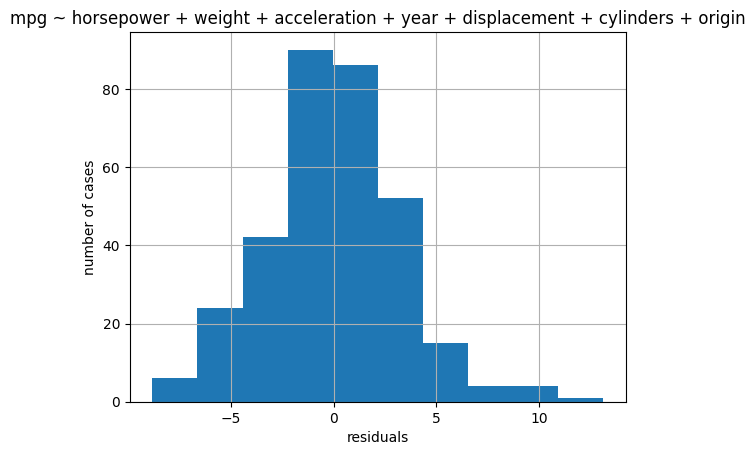

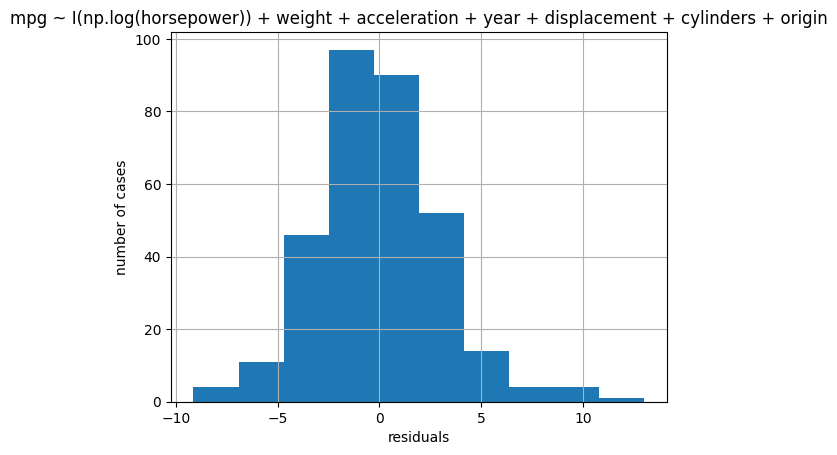

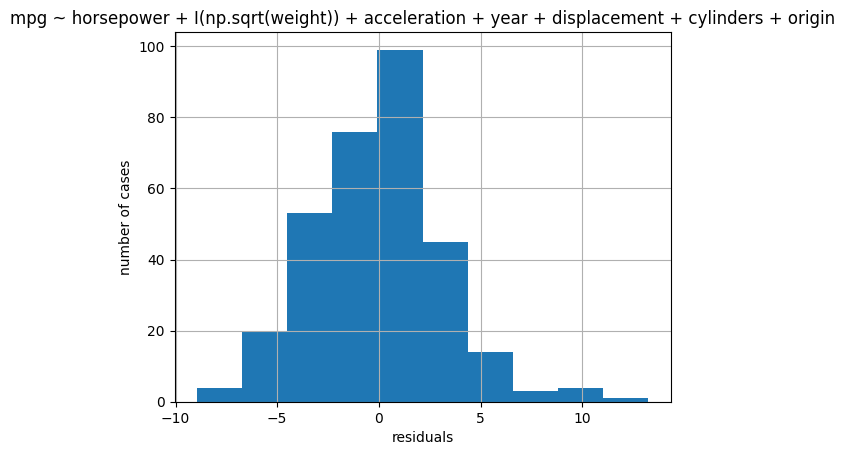

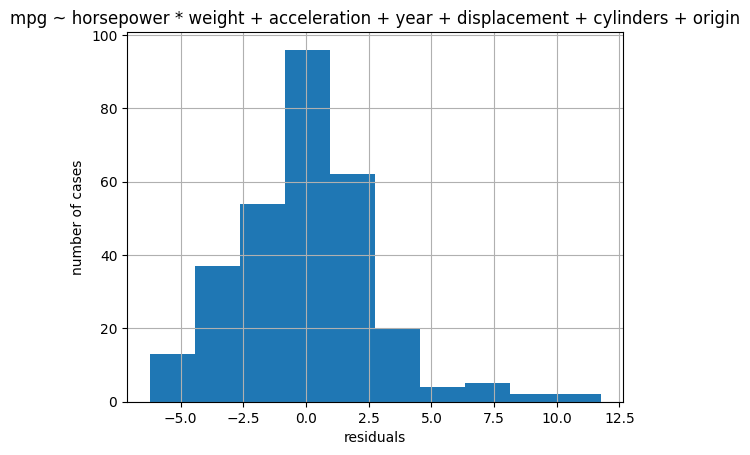

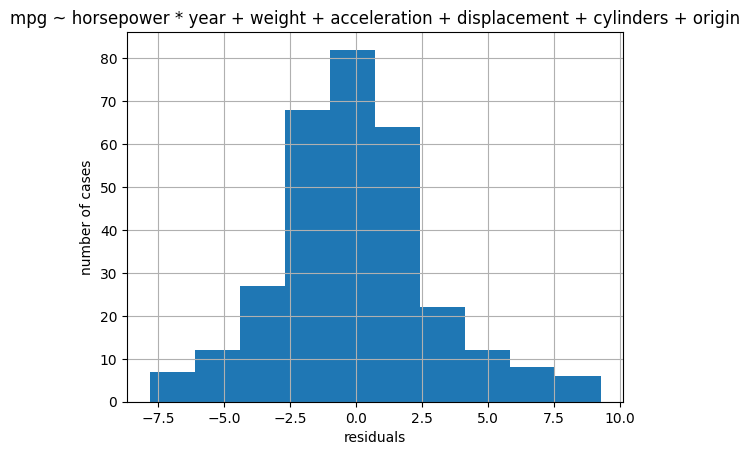

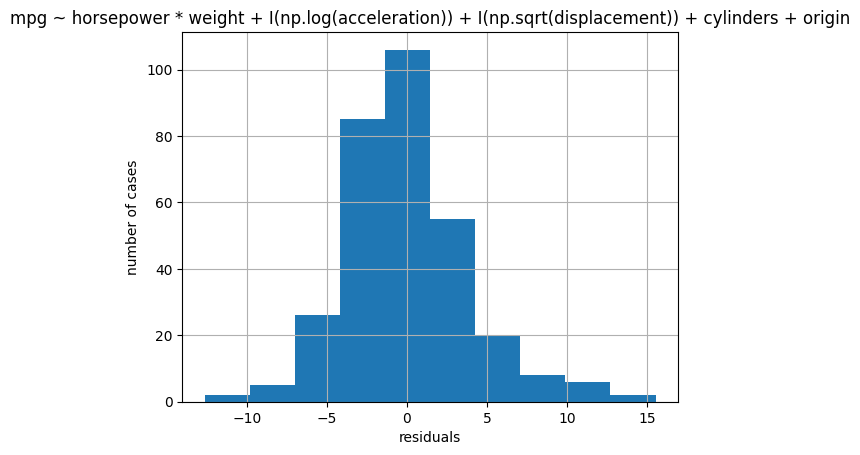

In [135]:
# Verify that residuals follow normal distribiution and look for outliers
plt.close()
for model in models:
    ax = myLinReg(model,auto).resid.hist()  
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(model)
    plt.show()
    plt.close()





mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 10.253459011272103
MSE_Test: 12.750686593034246



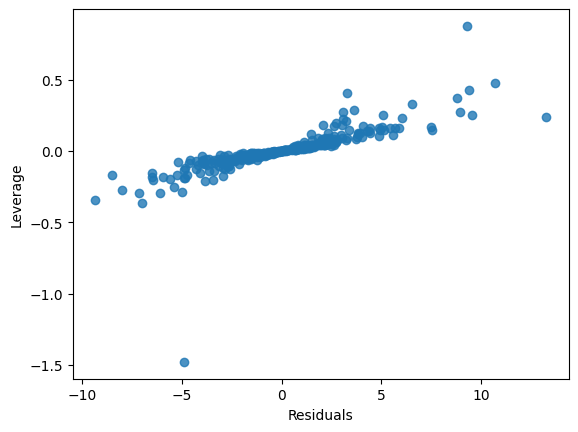

In [141]:
# Look for high leverage points that you might want to remove

result = myLinReg(models[0], auto, printMSE=True)
residuals = pd.Series(result.resid, name="Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
_ = sns.regplot(x=residuals, y=leverage, fit_reg=False)

leverage.sort_values().head()
plt.show()
plt.close()